Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
    - speedup
    - eficiencia
 - output: 
    - p_cores


In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

In [2]:
df_clean = pd.read_csv("dataset/clean_data.csv")

# df_clean = df_clean.round(decimals=2)

# df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
df_clean['input'] = df_clean['input']/df_clean['input'].max()

In [3]:
df_clean.columns

Index(['cores', 'input', 'average_runtime', 'speedup', 'efficiency'], dtype='object')

In [5]:
X = df_clean[['cores', 'input', 'average_runtime', 'speedup']].values
y = df_clean['efficiency'].values

### Regression Models

#### MLP Regression Model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [28]:
learning_rate = 0.00001
input_shape = (X_train.shape[1],)

callback = EarlyStopping(monitor="loss", patience=20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(X_test, y_test))

Epoch 1/100
7/7 - 0s - loss: 5.1831 - mse: 5.1831 - val_loss: 1.0908 - val_mse: 1.0908 - 297ms/epoch - 42ms/step
Epoch 2/100
7/7 - 0s - loss: 0.5349 - mse: 0.5349 - val_loss: 0.1245 - val_mse: 0.1245 - 22ms/epoch - 3ms/step
Epoch 3/100
7/7 - 0s - loss: 0.1124 - mse: 0.1124 - val_loss: 0.3548 - val_mse: 0.3548 - 23ms/epoch - 3ms/step
Epoch 4/100
7/7 - 0s - loss: 0.1188 - mse: 0.1188 - val_loss: 0.3250 - val_mse: 0.3250 - 24ms/epoch - 3ms/step
Epoch 5/100
7/7 - 0s - loss: 0.0948 - mse: 0.0948 - val_loss: 0.3172 - val_mse: 0.3172 - 25ms/epoch - 4ms/step
Epoch 6/100
7/7 - 0s - loss: 0.4288 - mse: 0.4288 - val_loss: 2.1561 - val_mse: 2.1561 - 28ms/epoch - 4ms/step
Epoch 7/100
7/7 - 0s - loss: 1.3007 - mse: 1.3007 - val_loss: 0.1031 - val_mse: 0.1031 - 24ms/epoch - 3ms/step
Epoch 8/100
7/7 - 0s - loss: 0.1278 - mse: 0.1278 - val_loss: 0.0824 - val_mse: 0.0824 - 23ms/epoch - 3ms/step
Epoch 9/100
7/7 - 0s - loss: 0.0702 - mse: 0.0702 - val_loss: 0.1990 - val_mse: 0.1990 - 24ms/epoch - 3ms/step

In [29]:
loss = model.evaluate(X_test, y_test)
print(f'Erro no conjunto de teste: {loss}')

predictions = model.predict(X_test)

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {predictions[i][0]}')

3/3 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Erro no conjunto de teste: [0.012491977773606777, 0.012491977773606777]
3/3 [==============================] - 0s 999us/step
Valor Real: 0.7987678192623822, Previsão: 0.7347270250320435
Valor Real: 0.2576656071333969, Previsão: 0.23085811734199524
Valor Real: 0.0978113630128791, Previsão: 0.1324608027935028
Valor Real: 0.0395369320423208, Previsão: 0.06556233763694763
Valor Real: 0.5126925506363381, Previsão: 0.4295611083507538
Valor Real: 0.5498949336204325, Previsão: 0.5307090878486633
Valor Real: 0.9076074836168472, Previsão: 0.6565358638763428
Valor Real: 1.0, Previsão: 1.0953149795532227
Valor Real: 0.281619991214921, Previsão: 0.3011878728866577
Valor Real: 0.4542886268470946, Previsão: 0.44390198588371277


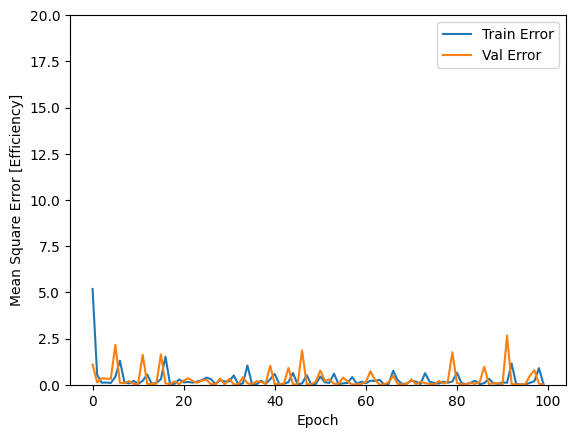

In [30]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Efficiency]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

#### MLP Regression Model with Leave-One-Out-Validation (LOOCV)

In [31]:
loo = LeaveOneOut()
mse_scores = []
callback = EarlyStopping(monitor="loss", patience=20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    learning_rate = 0.001
    input_shape = (X_train.shape[1],)

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[callback])

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

print(f'Erro médio quadrático usando LOOCV: {min(mse_scores)}')

1/1 [==============================] - 0s 28ms/step
Erro médio quadrático usando LOOCV: 2.8544541688845848e-11


In [28]:
PATH_MODEL_SAVE = "model/pascal_model_v2.keras"

model.save(PATH_MODEL_SAVE)